## Deep Learning Lunch and Learn, part 2

### A regession model with multiple inputs

#### Prepare the data

In [3]:
import pandas as pd

url = "https://raw.githubusercontent.com/tbenbrahim/deep-learning-lunch-and-learn/main/data/prices-size.csv"
data = pd.read_csv(url)
data.head(10)

,House,Taxes,Bedrooms,Baths,Quadrant,NW,price,size,lot
0,1,1360,3,2.0,NW,1,145000,1240,18000
1,2,1050,1,1.0,NW,1,68000,370,25000
2,3,1010,3,1.5,NW,1,115000,1130,25000
3,4,830,3,2.0,SW,0,69000,1120,17000
4,5,2150,3,2.0,NW,1,163000,1710,14000
5,6,1230,3,2.0,NW,1,69900,1010,8000
6,7,150,2,2.0,NW,1,50000,860,15300
7,8,1470,3,2.0,NW,1,137000,1420,18000
8,9,1850,3,2.0,NW,1,121300,1270,16000
9,10,320,3,2.0,NW,1,70000,1160,8000


In [6]:
data.drop('House', axis=1, inplace=True)

KeyError: "['House'] not found in axis"

In [7]:
data['Quadrant'].unique()

array(['NW', 'SW', 'NE', 'SE'], dtype=object)

In [11]:
data['SW'] = data['Quadrant'].apply(lambda x: 1 if x == 'SW' else 0)
data['NW'] = data['Quadrant'].apply(lambda x: 1 if x == 'NW' else 0)
data['NE'] = data['Quadrant'].apply(lambda x: 1 if x == 'NE' else 0)
data['SE'] = data['Quadrant'].apply(lambda x: 1 if x == 'SE' else 0)
data

,Taxes,Bedrooms,Baths,Quadrant,NW,price,size,lot,SW,NE,SE
0,1360,3,2.0,NW,1,145000,1240,18000,0,0,0
1,1050,1,1.0,NW,1,68000,370,25000,0,0,0
2,1010,3,1.5,NW,1,115000,1130,25000,0,0,0
3,830,3,2.0,SW,0,69000,1120,17000,1,0,0
4,2150,3,2.0,NW,1,163000,1710,14000,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
95,990,2,2.0,NW,1,176000,1060,27500,0,0,0
96,3030,3,2.0,SW,0,196500,1730,47400,1,0,0
97,1580,3,2.0,NW,1,132200,1370,18000,0,0,0
98,1770,3,2.0,NE,0,88400,1560,12000,0,1,0


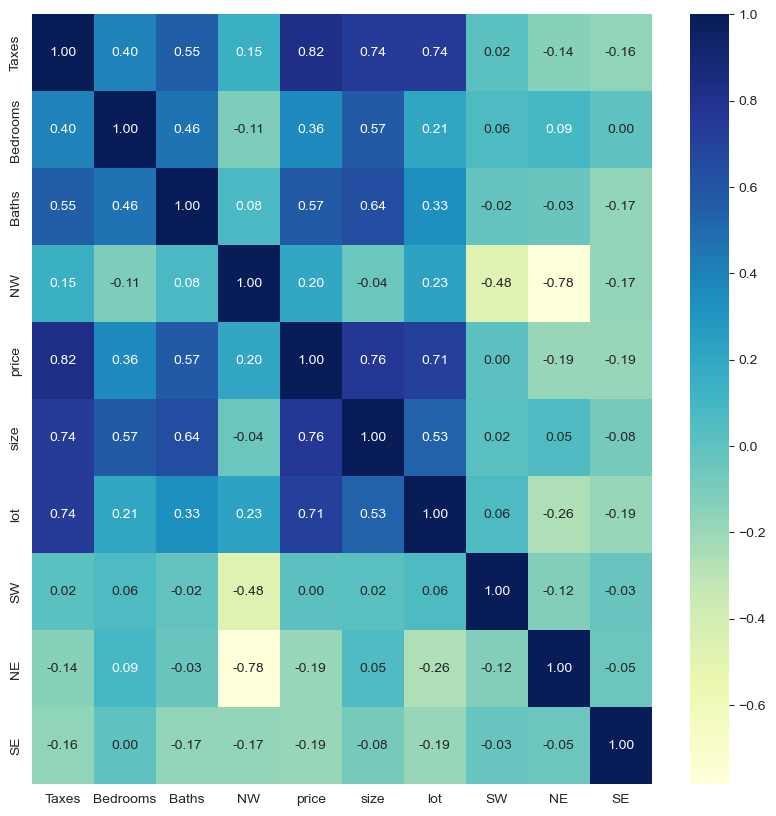

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 10))
sns.heatmap(data.corr(numeric_only=True), annot=True, fmt='.2f', cmap="YlGnBu")
plt.show()

#### Use CUDA if available

In [ ]:
import torch

if torch.cuda.is_available():
    dev = "cuda:0"
else:
    dev = "cpu"
device = torch.device(dev)
print("Running on {}".format(dev))